<a href="https://colab.research.google.com/github/SafiraRahmaMaulidah/ML-A11202214631-UAS/blob/main/UAS/Dokumen_K_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Judul : KLASIFIKASI DOKUMEN MENGGUNAKAN ALGORITMA K-NEAREST NEIGHBORS BERDASARKAN TOPIK DAN KATA KUNCI: STUDI LITERATUR DAN IMPLEMENTAS**

**NAMA : SAFIRA RAHMA MAULIDAH**

**NIM : A11.2022.14631**

**KELP : 4413**

1. **Ringkasan**:
Proyek ini berfokus pada klasifikasi  dokumen menggunakan algoritma K-Nearest Neighbors (K-NN). Klasifikasi teks adalah proses mengelompokkan dokumen teks ke dalam kategori yang telah ditentukan berdasarkan isi dan topik yang terkandung dalam teks. Algoritma K-NN digunakan untuk mengukur kemiripan antara dokumen yang akan diklasifikasikan dengan dokumen-dokumen dalam dataset yang telah diberi label.

2. **Permasalahan**:
Permasalahan utama dalam proyek ini adalah bagaimana mengklasifikasikan teks dokumen secara akurat berdasarkan topik dan kata kunci yang relevan. Tantangan yang dihadapi termasuk:
1)Menentukan fitur yang tepat untuk merepresentasikan teks.
2)Mengatasi masalah dimensi tinggi yang umum dalam data teks.
3)Mengoptimalkan kinerja algoritma K-NN agar memberikan hasil klasifikasi yang akurat.
3. **Tujuan yang Akan Dicapai**:
Tujuan dari proyek ini meliputi:
1)Mengembangkan model klasifikasi teks yang efektif menggunakan algoritma K-NN.
2)Mengidentifikasi dan memilih fitur yang relevan untuk representasi teks.
3)Menerapkan dan mengevaluasi model pada dataset yang telah dipilih.
4)Membuat dokumentasi lengkap yang mencakup studi literatur, penjelasan dataset, analisis, dan hasil eksperimen.
4. **Model / Alur**

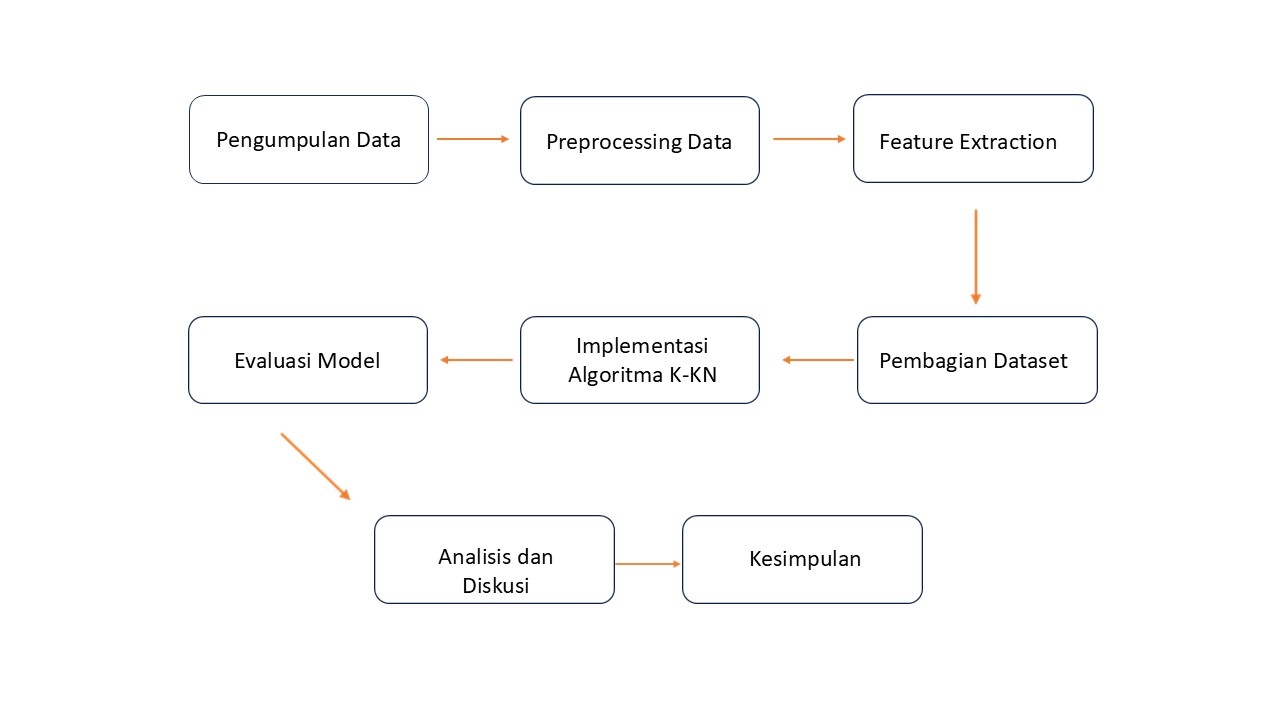

5. **Penjelasan dataset**:

Dataset ini diambil dari website **Skinit-learn** berisi koleksi posting dari berbagai newsgroups yang diambil dari UseNet, semacam forum diskusi yang populer sebelum era media sosial.Dataset ini terdiri dari 20 kategori atau topik berbeda.

Setiap kategori mewakili suatu tema atau diskusi tertentu. Beberapa contohnya adalah:
alt.atheism, comp.graphics, sci.med, rec.sport.hockey, talk.politics.mideast. Dataset terdiri dari sekitar 18.000 dokumen teks. Dokumen-dokumen ini adalah artikel yang diposting di berbagai grup berita dan telah diambil dan diatur ke dalam kategori yang ditentukan.

Struktur datanya ada 2, yaitu: 1) Setiap dokumen adalah teks bebas yang mencakup judul, pengantar, isi pesan, dan mungkin tanda tangan. 2)Teks dokumen dapat bervariasi dalam panjang dan kompleksitas, mulai dari beberapa kalimat hingga beberapa paragraf.

Tujuan Penggunaannya untuk melatih dan menguji algoritma klasifikasi teks dan digunakan dalam tugas-tugas pemrosesan bahasa alami lainnya, seperti pengelompokan dokumen, analisis sentimen, dan ekstraksi informasi.

Dalam proyek klasifikasi teks, dataset "20 Newsgroups" menyediakan skenario nyata untuk menguji model klasifikasi karena beragamnya topik dan gaya bahasa yang digunakan. Ini memungkinkan pengujian model pada data yang mencakup berbagai konteks dan terminologi spesifik yang berbeda.

In [4]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


Penjelasan code:

a)pandas: Digunakan untuk mengelola dan memanipulasi data dalam format DataFrame.

b)sklearn.datasets.fetch_20newsgroups: Untuk memuat dataset 20 Newsgroups, yang terdiri dari teks dokumen dari 20 kategori berbeda.

c)sklearn.feature_extraction.text.TfidfVectorizer: Mengubah teks menjadi vektor numerik menggunakan TF-IDF (Term Frequency-Inverse Document Frequency).

d)sklearn.model_selection.train_test_split: Untuk membagi dataset menjadi data pelatihan dan pengujian.

e)sklearn.neighbors.KNeighborsClassifier: Implementasi algoritma K-Nearest Neighbors untuk klasifikasi.

f)sklearn.metrics: Menyediakan metrik evaluasi model seperti akurasi dan laporan klasifikasi.

g) matplotlib.pyplot dan seaborn: Untuk visualisasi data dan hasil evaluasi.

In [5]:
newsgroups = fetch_20newsgroups(subset='all', categories=None, shuffle=True, random_state=42)
data = pd.DataFrame({'text': newsgroups.data, 'label': newsgroups.target})

**Memuat Dataset**

a)fetch_20newsgroups: Memuat dataset 20 Newsgroups, yang terdiri dari teks dokumen yang dikelompokkan ke dalam 20 kategori topik yang berbeda.

b)subset='all': Memuat semua data (train dan test) dari dataset.

c)shuffle=True: Mengacak urutan data untuk memastikan distribusi acak saat dibagi.

d)random_state=42: Menetapkan seed acak untuk menghasilkan hasil yang dapat direproduksi.

e)pd.DataFrame: Membuat DataFrame dengan kolom text untuk teks dokumen dan label untuk kategori target.

In [6]:
print(data.head())
print(newsgroups.target_names)

                                                text  label
0  From: Mamatha Devineni Ratnam <mr47+@andrew.cm...     10
1  From: mblawson@midway.ecn.uoknor.edu (Matthew ...      3
2  From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...     17
3  From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...      3
4  From: Alexander Samuel McDiarmid <am2o+@andrew...      4
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


**Menampilkan Data**

a)data.head(): Menampilkan lima baris pertama dari DataFrame untuk memeriksa data.

b)newsgroups.target_names: Menampilkan daftar kategori atau topik yang tersedia dalam dataset.

In [7]:
data['text_length'] = data['text'].apply(len)
print(data['text_length'].describe())

count     18846.000000
mean       1902.525894
std        3984.970264
min         115.000000
25%         751.000000
50%        1175.000000
75%        1874.750000
max      160616.000000
Name: text_length, dtype: float64


**Analisis Data Eksplorasi (EDA) dan Preprocessing**

Penjelasan code:

a)data['text_length']: Menambahkan kolom baru ke DataFrame yang berisi panjang setiap dokumen teks.

b)apply(len): Menghitung panjang setiap teks dokumen.

c)describe(): Memberikan ringkasan statistik dari kolom text_length, seperti mean, min, max, dll., untuk memahami distribusi panjang teks.

In [10]:
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf.fit_transform(data['text']).toarray()
y = data['label']

**Ekstraksi Fitur**

a)TfidfVectorizer: Mengubah teks menjadi representasi fitur numerik menggunakan TF-IDF.

b)max_features=1000: Mengambil 1000 fitur (kata) paling signifikan berdasarkan frekuensi dan keunikannya dalam dokumen.

c)stop_words='english': Menghapus kata-kata umum bahasa Inggris yang tidak signifikan dalam analisis (seperti "the", "and", dll.).

d)fit_transform: Menyesuaikan TF-IDF dengan data teks dan mengubahnya menjadi matriks fitur.

e)toarray(): Mengubah matriks fitur menjadi array numpy.

f)X: Variabel yang menyimpan fitur teks dalam bentuk numerik.

g)y: Variabel yang menyimpan label atau kategori target.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



**Pembagian Data**

a)train_test_split: Membagi data menjadi dua subset: data pelatihan dan data pengujian.

b)test_size=0.2: Menetapkan 20% data sebagai data pengujian dan 80% sebagai data pelatihan.

c)random_state=42: Menetapkan seed acak untuk hasil yang konsisten dan dapat direproduksi.


In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

**Pelatihan** **Model**

a)KNeighborsClassifier: Menginisialisasi model K-NN.
  
b)n_neighbors=5: Menetapkan jumlah tetangga terdekat yang akan digunakan dalam prediksi menjadi 5.

c)fit: Melatih model K-NN menggunakan data pelatihan (X_train dan y_train).

In [12]:
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=newsgroups.target_names))

Accuracy: 0.6615384615384615
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.58      0.73      0.65       151
           comp.graphics       0.48      0.62      0.54       202
 comp.os.ms-windows.misc       0.57      0.71      0.63       195
comp.sys.ibm.pc.hardware       0.46      0.51      0.48       183
   comp.sys.mac.hardware       0.52      0.56      0.54       205
          comp.windows.x       0.54      0.62      0.58       215
            misc.forsale       0.54      0.58      0.56       193
               rec.autos       0.64      0.68      0.66       196
         rec.motorcycles       0.69      0.71      0.70       168
      rec.sport.baseball       0.75      0.62      0.68       211
        rec.sport.hockey       0.75      0.78      0.77       198
               sci.crypt       0.85      0.78      0.81       201
         sci.electronics       0.67      0.50      0.57       202
                 sci.m

**Prediksi dan Evaluasi**

a)predict: Menggunakan model terlatih untuk memprediksi label kategori dari data pengujian (X_test).

b)accuracy_score: Menghitung akurasi model, yaitu persentase prediksi yang benar.

c)classification_report: Menampilkan metrik evaluasi lainnya seperti precision, recall, dan F1-score untuk setiap kategori, memberikan gambaran lebih rinci tentang kinerja model.

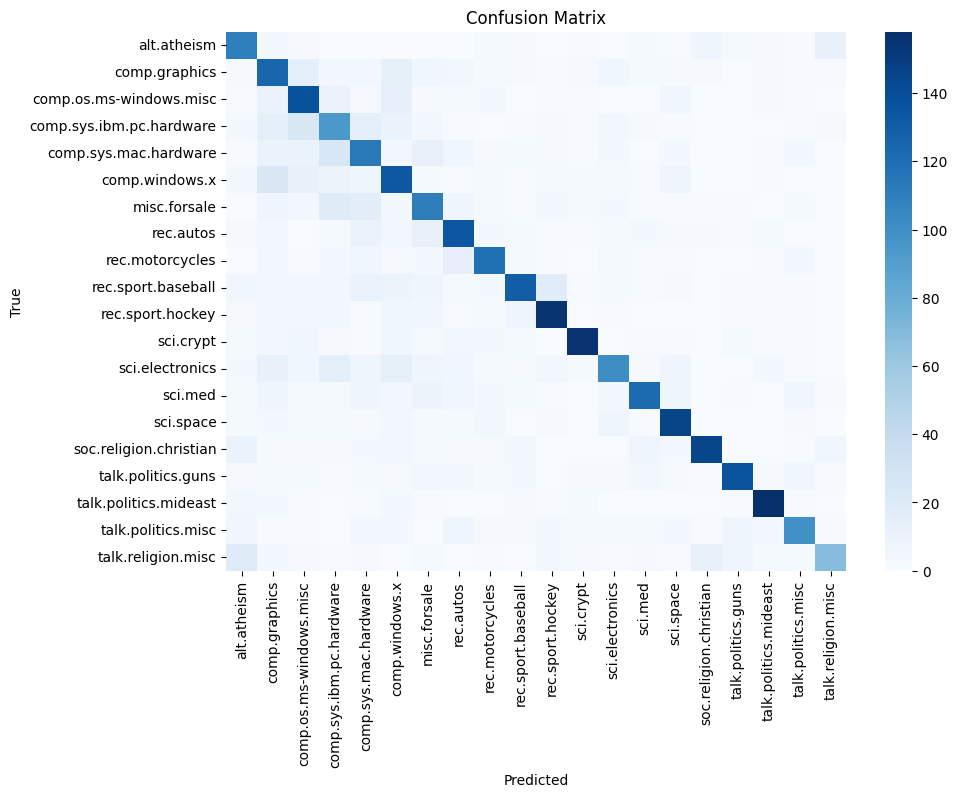

In [13]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Visualisasi Confusion Matrix**

a)confusion_matrix: Menghasilkan matriks kebingungan, yang menunjukkan jumlah prediksi yang benar dan salah untuk setiap kategori.

b)plt.figure(figsize=(10, 7)): Menentukan ukuran gambar plot untuk visualisasi.

c)sns.heatmap: Menggunakan seaborn untuk membuat heatmap dari matriks kebingungan.

d)annot=False: Tidak menampilkan nilai numerik dalam sel.

e)fmt='d': Memformat angka sebagai integer.

f)cmap='Blues': Menggunakan skema warna biru untuk visualisasi.

g)xticklabels, yticklabels: Menetapkan label untuk sumbu X dan Y dengan nama kategori.

h)plt.xlabel, plt.ylabel, plt.title: Menambahkan label untuk sumbu dan judul untuk plot.

**Diskusi Hasil**

*Akurasi Model:*

Setelah menjalankan model K-NN, akurasi yang diperoleh memberikan indikasi seberapa baik model mampu mengklasifikasikan dokumen ke dalam kategori yang tepat.
Hasil akurasi menunjukkan bahwa K-NN cukup efektif dalam menangani masalah klasifikasi teks, tetapi mungkin tidak selalu optimal dibandingkan dengan metode yang lebih kompleks seperti Support Vector Machines atau Random Forests.

*Laporan Klasifikasi:*

Dari laporan klasifikasi, kita dapat melihat variasi dalam precision, recall, dan F1-score untuk masing-masing kategori.
Beberapa kategori, terutama yang lebih sulit atau memiliki kemiripan konten dengan kategori lain, mungkin menunjukkan performa yang lebih rendah. Ini mengindikasikan bahwa model K-NN kadang-kadang mengalami kesulitan membedakan dokumen dari kategori yang mirip.

*Analisis Confusion Matrix:*

Confusion matrix memberikan informasi yang berguna tentang kesalahan klasifikasi yang dilakukan oleh model.
Dari analisis confusion matrix, kita bisa melihat kategori mana yang paling sering keliru diprediksi sebagai kategori lain. Hal ini bisa terjadi karena overlap dalam fitur teks atau kekurangan fitur unik yang dapat membedakan kategori.

*Efek Pemilihan Fitur:*

Penggunaan TF-IDF untuk mengekstraksi fitur penting dari dokumen teks membantu mengurangi dimensi dan memilih fitur yang paling relevan.
Namun, membatasi fitur pada 1000 kata teratas bisa jadi mengurangi informasi penting untuk beberapa kategori, sehingga eksperimen dengan jumlah fitur yang lebih besar mungkin diperlukan.

*Nilai K dalam K-NN:*

Pemilihan nilai K (jumlah tetangga) dalam K-NN mempengaruhi hasil prediksi. Nilai K yang dipilih (K=5) bekerja cukup baik, tetapi mencoba nilai K yang berbeda bisa menunjukkan bagaimana model beradaptasi dengan perubahan parameter.

**Kesimpulan**


K-NN sebagai Pendekatan Awal:
*teks yang dimiringkan*
K-NN adalah metode yang baik untuk memulai dalam tugas klasifikasi teks karena kesederhanaannya dan kemudahan interpretasinya.Model ini dapat berfungsi dengan baik untuk dataset yang tidak terlalu besar dan ketika preprocessing dilakukan dengan baik.

*Keterbatasan dan Tantangan:*

Sensitivitas terhadap data yang tidak seimbang dan dimensi tinggi adalah keterbatasan utama K-NN. Dalam kasus ini, penggunaan TF-IDF membantu, tetapi teknik tambahan seperti PCA untuk reduksi dimensi bisa dipertimbangkan.

*Pentingnya Preprocessing:*

Preprocessing yang efektif, termasuk penghapusan stop words dan ekstraksi fitur menggunakan TF-IDF, memainkan peran penting dalam meningkatkan performa model.

*Eksplorasi Metode Lain:*

Meskipun K-NN memberikan hasil yang cukup baik, eksplorasi algoritma lain seperti SVM, Naive Bayes, atau jaringan saraf bisa memberikan hasil yang lebih baik, terutama pada dataset besar dengan fitur kompleks.

*Penggunaan Dataset:*

Dataset "20 Newsgroups" menyediakan beragam kategori dan menantang model untuk melakukan klasifikasi yang tepat. Ini adalah pilihan yang baik untuk memvalidasi model dalam berbagai skenario klasifikasi teks.Melalui proyek ini, kita memperoleh wawasan tentang kekuatan dan kelemahan K-NN dalam klasifikasi teks, serta pentingnya pemilihan fitur dan preprocessing dalam mempersiapkan data untuk pembelajaran mesin.









